# Data wrangling WeRateDogs

##### By Ruby Villacorta

## Table of Contents
- [Introduction](#intro)
- [Gathering data](#gather)
- [Assessing data](#assess)
   - [Quality](#quality)
   - [Tidiness](#tidiness)
- [Cleaning data](#clean)
- [Storing, Analyzing, and Visualizing](#storing)
   - [Insight one & visualization](#one)
   - [Insight two](#two)
   - [Insight three & visualization](#three)
   - [Insight four & visualization](#four)

<a id='intro'></a>
## Introduction



The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 

<a id='gather'></a>
## Gathering data

1. **Twitter archive file:** download this file manually by clicking the following link: twitter_archive_enhanced.csv

- **The tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- **Twitter API & JSON:** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
    Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

**1. Twitter archive file**

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json 

In [2]:
#Read CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.sort_values('timestamp')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**2. Tweet image prediction**

In [5]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [6]:
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

auth = tweepy.OAuthHandler('5Uur0mo4ol2kB8yhtZ1VxXS0u', 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH')
auth.set_access_token('303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB', 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)


**3. Twitter API & JSON**

https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

In [7]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 606
Rate limit reached. Sleeping for: 608


In [8]:
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2345
The list of tweets no found 11


In [10]:
#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list

my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [11]:
#we write this list into a txt file:

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [12]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])


In [9]:
tweet_json.head()

NameError: name 'tweet_json' is not defined

In [14]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 8 columns):
tweet_id            2344 non-null object
favorite_count      2344 non-null int64
retweet_count       2344 non-null int64
followers_count     2344 non-null int64
friends_count       2344 non-null int64
source              2344 non-null object
retweeted_status    2344 non-null object
url                 2344 non-null object
dtypes: int64(4), object(4)
memory usage: 146.6+ KB


<a id='assess'></a>
## Assessing data

### Visual assessment

Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.

In [15]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [16]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,38845,8604,6829008,103,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33269,6319,6829008,103,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,25065,4194,6829008,103,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,42221,8713,6829008,103,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,40364,9484,6829009,103,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,20244,3137,6829009,103,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,11863,2090,6829010,103,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,65628,19067,6829010,103,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,27796,4304,6829010,103,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,31982,7479,6829010,103,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


### Programmatic assessment

Pandas' functions and/or methods are used to assess the data.

In [18]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [20]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
print(twitter_archive.loc[twitter_archive.rating_numerator == 204, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 143, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 666, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 1176, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 144, 'text'])

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
Series([], Name: text, dtype: object)
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object


In [22]:
#print whole text in order to verify numerators and denominators
print(twitter_archive['text'][1120]) #17 dogs
print(twitter_archive['text'][1634]) #13 dogs
print(twitter_archive['text'][313]) #just a tweet to explain actual ratings, this will be ignored when cleaning data
print(twitter_archive['text'][189]) #no picture, this will be ignored when cleaning data
print(twitter_archive['text'][1779]) #12 dogs

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq


In [23]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [194]:
print(twitter_archive.loc[twitter_archive.rating_denominator == 11, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 2, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 16, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 15, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 7, 'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [25]:
print(twitter_archive['text'][784]) #retweet - it will be deleted when delete all retweets
print(twitter_archive['text'][1068]) #actual rating 14/10 need to change manually
print(twitter_archive['text'][1662]) #actual rating 10/10 need to change manually
print(twitter_archive['text'][2335]) #actual rating 9/10 need to change manually
print(twitter_archive['text'][1663]) # tweet to explain rating
print(twitter_archive['text'][342]) #no rating - delete
print(twitter_archive['text'][516]) #no rating - delete

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [26]:
#   UDACITY REVIEWER POINT: 
#Check the numerator - in the source data there seems to be fractional numerators. Are those preserved 
#when exporting the data? Take a look at the id = 681340665377193000

#TWITTER_ID NOT FOUND

twitter_archive[twitter_archive['tweet_id'] == 681340665377193000]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [27]:
# Reviewer point brought something to my attention that it was not picked up during the first assessment

with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [28]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
61,667152164079423490,https://pbs.twimg.com/media/CUIzWk_UwAAfUNq.jpg,1,toy_poodle,0.535411,True,Pomeranian,0.087544,True,miniature_poodle,0.062050,True
191,669564461267722241,https://pbs.twimg.com/media/CUrFUvDVAAA9H-F.jpg,1,toy_poodle,0.623685,True,miniature_poodle,0.259920,True,standard_poodle,0.082530,True
1628,804738756058218496,https://pbs.twimg.com/media/CysBn-lWIAAoRx1.jpg,1,Tibetan_mastiff,0.915790,True,German_shepherd,0.062480,True,Leonberg,0.008297,True
380,673295268553605120,https://pbs.twimg.com/media/CVgGc9hWIAIe1bn.jpg,1,golden_retriever,0.889241,True,Labrador_retriever,0.064683,True,Great_Pyrenees,0.012613,True
1689,815639385530101762,https://pbs.twimg.com/media/C1G7sXyWIAA10eH.jpg,1,German_shepherd,0.817953,True,Norwegian_elkhound,0.140007,True,malinois,0.024821,True
1808,832636094638288896,https://pbs.twimg.com/media/C44eG7oUMAAA4Ss.jpg,1,Eskimo_dog,0.525032,True,Siberian_husky,0.252238,True,malamute,0.216839,True
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
1581,796484825502875648,https://pbs.twimg.com/media/Cw2uty8VQAAB0pL.jpg,1,cocker_spaniel,0.116924,True,seat_belt,0.107511,False,Australian_terrier,0.099843,True
407,673709992831262724,https://pbs.twimg.com/media/CVl_qbjW4AA8Mam.jpg,1,Chihuahua,0.330171,True,Siamese_cat,0.181580,False,kelpie,0.178227,True
772,689557536375177216,https://pbs.twimg.com/media/CZHM60BWIAA4AY4.jpg,1,Eskimo_dog,0.169482,True,Siberian_husky,0.161655,True,dingo,0.154414,False


In [29]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
sum(image_prediction.jpg_url.duplicated())

66

In [31]:
pd.concat(g for _, g in image_prediction.groupby("jpg_url") if len(g) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [32]:
print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [33]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [34]:
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
241,845677943972139009,26622,5210,6829016,103,Twitter for iPhone,Original tweet,https://t.co/R6xQ5n19T3
502,811985624773361665,7944,1587,6829027,103,Twitter for iPhone,Original tweet,https://t.co/sIB5C6FDop
626,793500921481273345,11715,2694,6829029,103,Twitter for iPhone,Original tweet,https://t.co/aF5MmpvPqN
1495,691756958957883396,3101,1125,6829194,103,Twitter for iPhone,Original tweet,https://t.co/frGWV7IP6J
1674,681610798867845120,2047,518,6829217,103,Twitter for iPhone,Original tweet,https://t.co/C7M8mnzHIK
3,891689557279858688,42221,8713,6829008,103,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
1551,688211956440801280,2381,919,6827655,103,Twitter for iPhone,Original tweet,https://t.co/o4Nfc8WoAO
578,799422933579902976,8800,2157,6829029,103,Twitter for iPhone,Original tweet,https://t.co/cWlAEOZefY
887,758854675097526272,3841,993,6829041,103,Twitter for iPhone,Original tweet,https://t.co/4UrfOZhztW
569,800513324630806528,14392,3397,6829029,103,Twitter for iPhone,Original tweet,https://t.co/ILHGs0e6Dm


In [35]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 8 columns):
tweet_id            2344 non-null object
favorite_count      2344 non-null int64
retweet_count       2344 non-null int64
followers_count     2344 non-null int64
friends_count       2344 non-null int64
source              2344 non-null object
retweeted_status    2344 non-null object
url                 2344 non-null object
dtypes: int64(4), object(4)
memory usage: 146.6+ KB


In [36]:
tweet_json.retweeted_status.value_counts()

Original tweet       2174
This is a retweet     170
Name: retweeted_status, dtype: int64

In [37]:
tweet_json.source.value_counts()

Twitter for iPhone     2209
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

<a id='quality'></a>
### Quality

*Completeness, validity, accuracy, consistency (content issues)*

### *twitter_archive*
1. Keep original ratings (no retweets) that have images
- Delete columns that won't be used for analysis
- Erroneous datatypes (doggo, floofer, pupper and puppo columns)
- Separate timestamp into day - month - year (3 columns)
- Correct numerators with decimals
- Correc denominators other than 10: 
    
    a. Manually (few examples assessed by individual print text).
    
    b. Programatically (Tweets with denominator not equal to 10 are usually multiple dogs). 


### *image_prediction*
6. Drop 66 jpg_url duplicated
7. Create 1 column for image prediction and 1 column for confidence level
8. Delete columns that won't be used for analysis 

### *tweet_json*
1. Keep original tweets only


<a id='tidiness'></a>
### Tidiness 

1. Change tweet_id to type int64 in order to merge with the other 2 tables
- All tables should be part of one dataset

<a id='clean'></a>
## Cleaning Data

In [10]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

NameError: name 'tweet_json' is not defined

**1. Twitter archive** - keep original ratings (no retweets) that have images. 

Based on info, there are 181 values in retweeted_status_id and retweeted_status_user_id. Delete the retweets. Once I merge twitter_archive and image_prediction, I will only keep the ones with images.

In [11]:
#CODE: Delete retweets by filtering the NaN of retweeted_status_user_id
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

#TEST
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


**2. Twitter archive** - Delete columns that won't be used for analysis

In [12]:
#get the column names of twitter_archive_clean
print(list(twitter_archive_clean))

#CODE: Delete columns no needed
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)


['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [13]:
#TEST
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

**3. Twitter_archive** - Erroneous datatypes (doggo, floofer, pupper and puppo columns)

Melt the doggo, floofer, pupper and puppo columns to *dogs* and *dogs_stage* column. Then drop *dogs*. Sort by *dogs_stage* in order to then drop duplicated based on tweet_id except for the last occurrence.

In [14]:
#CODE: Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id',                                          
                                                                'timestamp',
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name'],
                               var_name='dogs', value_name='dogs_stage')

#CODE: drop dogs
twitter_archive_clean = twitter_archive_clean.drop('dogs', 1)

#CODE: Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')
                            

In [15]:
#TEST
twitter_archive_clean['dogs_stage'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

**4. Twitter_archive** - Separate timestamp into day - month - year (3 columns)

First convert *timestamp* to datetime. Then extract year, month and day to new columns. Finally drop *timestamp* column. 

In [16]:
#CODE: convert timestamp to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#extract year, month and day to new columns
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

#Finally drop timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

In [17]:
#TEST
list(twitter_archive_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_stage',
 'year',
 'month',
 'day']

**5. Twitter_archive** - Correc numerators

In [268]:

twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 9 columns):
tweet_id              2175 non-null int64
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dogs_stage            2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 169.9+ KB


In [18]:
#CODE

#First change numerator and denominators type int to float to allow decimals 
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#TEST
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:16: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
4967,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


**6. Twitter_archive** - Correc denominators

#### *a. Manually*
Five tweets with denominator not equal to 10 for special circunstances. Update both numerators and denominators when necessary. Delete other five tweets because they do not have actual ratings.

In [19]:
#CODE: Update both numerators and denominators
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#CODE: Delete five tweets with no actual ratings
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 832088576586297345]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 682808988178739200]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 835246439529840640]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 686035780142297088]

#TEST: Left only the group dogs for programatically clean
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
3429,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
3631,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0
3630,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
3250,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
3225,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
3270,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
3347,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
3775,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120.0
3839,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88.0,80.0
2538,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0


#### *b. Programatically* 
These tweets with denominator not equal to 10 are multiple dogs. For example, tweet_id 713900603437621000 has numerator and denominators 99/90 because there are 9 dogs in the picture https://t.co/mpvaVxKmc1.  

In [271]:
#CODE: Create a new column with rating in float type to avoid converting all int column to float
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)

#TEST
twitter_archive_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating
4817,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 ...",11.0,10.0,None,pupper,2016,11,25,11.0
2052,668226093875376128,Sneaky dog here. Tuba player has no clue. 10/1...,10.0,10.0,None,None,2015,11,22,10.0
4810,803638050916102144,Pupper hath acquire enemy. 13/10 https://t.co/...,13.0,10.0,None,pupper,2016,11,29,13.0
2307,863062471531167744,Say hello to Quinn. She's quite the goofball. ...,13.0,10.0,Quinn,None,2017,5,12,13.0
2932,754482103782404096,This is Milo. He's currently plotting his reve...,10.0,10.0,Milo,None,2016,7,17,10.0


**7. Image_prediction** - Drop 66 jpg_url duplicated

In [272]:
#CODE: Delete duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#TEST
sum(image_prediction_clean['jpg_url'].duplicated())

0

** 8. Image_prediction** - Create 1 column for image prediction and 1 column for confidence level

Create a function where I keep the first true prediction along the confidence level as new columns. 

In [273]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_list'] = confidence_list

In [274]:
#drop rows that has prediction_list 'error'
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']

#TEST: 
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
img_num            1691 non-null int64
p1                 1691 non-null object
p1_conf            1691 non-null float64
p1_dog             1691 non-null bool
p2                 1691 non-null object
p2_conf            1691 non-null float64
p2_dog             1691 non-null bool
p3                 1691 non-null object
p3_conf            1691 non-null float64
p3_dog             1691 non-null bool
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


**9. Image_prediction** - Delete columns that won't be used for analysis

In [275]:
#CODE: print list of image_prediction columns
print(list(image_prediction_clean))

#Delete columns
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#TEST
list(image_prediction_clean)

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence_list']


['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

**10. Tweet_json** - keep 2174 original tweets 

In [276]:
#CODE:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

#TEST
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2174
Name: retweeted_status, dtype: int64

**11. Tidiness** - Change tweet_id to type int64 in order to merge with the other 2 tables

In [277]:
#CODE: change tweet_id from str to int
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(int)

#TEST
tweet_json_clean['tweet_id'].dtypes

dtype('int64')

**12. Tidiness** - All tables should be part of one dataset

In [278]:
#CODE: create a new dataframe that merge twitter_archive_clean and 
#image_prediction_clean
df_twitter1 = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]

#TEST
df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1 to 2169
Data columns (total 13 columns):
tweet_id              1625 non-null int64
text                  1625 non-null object
rating_numerator      1625 non-null float64
rating_denominator    1625 non-null float64
name                  1625 non-null object
dogs_stage            1625 non-null object
year                  1625 non-null int64
month                 1625 non-null int64
day                   1625 non-null int64
rating                1625 non-null float64
jpg_url               1625 non-null object
dog_type              1625 non-null object
confidence_list       1625 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 177.7+ KB


In [279]:
#CODE: create a new dataframe that merge df_twitter and tweet_json_clean
df_twitter = pd.merge(df_twitter1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 20 columns):
tweet_id              1625 non-null int64
text                  1625 non-null object
rating_numerator      1625 non-null float64
rating_denominator    1625 non-null float64
name                  1625 non-null object
dogs_stage            1625 non-null object
year                  1625 non-null int64
month                 1625 non-null int64
day                   1625 non-null int64
rating                1625 non-null float64
jpg_url               1625 non-null object
dog_type              1625 non-null object
confidence_list       1625 non-null object
favorite_count        1624 non-null float64
retweet_count         1624 non-null float64
followers_count       1624 non-null float64
friends_count         1624 non-null float64
source                1624 non-null object
retweeted_status      1624 non-null object
url                   1624 non-null object
dtypes: float64(7), int64(4), 

In [280]:
df_twitter['rating_numerator'].value_counts()

12.00     404
10.00     354
11.00     342
13.00     212
9.00      133
8.00       68
7.00       31
14.00      22
6.00       16
5.00       13
4.00        6
3.00        5
2.00        2
13.50       2
44.00       1
143.00      1
99.00       1
45.00       1
60.00       1
144.00      1
88.00       1
84.00       1
9.75        1
0.00        1
11.26       1
165.00      1
11.27       1
121.00      1
80.00       1
Name: rating_numerator, dtype: int64

<a id='storing'></a>
## Storing, Analyzing, and Visualizing Data

In [281]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

<a id='one'></a>
### Insight one & visualization

Golden retriever is the most common dog in this dataset.

In [282]:
df_twitter['dog_type'].value_counts()

golden_retriever                  142
Labrador_retriever                103
Pembroke                           94
Chihuahua                          87
pug                                60
toy_poodle                         50
chow                               45
Pomeranian                         42
Samoyed                            38
malamute                           32
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     26
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Siberian_husky                     20
Shih-Tzu                           20
Staffordshire_bullterrier          20
Cardigan                           19
beagle                             19
Shetland_sheepdog                  19
Maltese_dog                        19
Rottweiler                         19
kuvasz                             18
basset                             17
Italian_grey

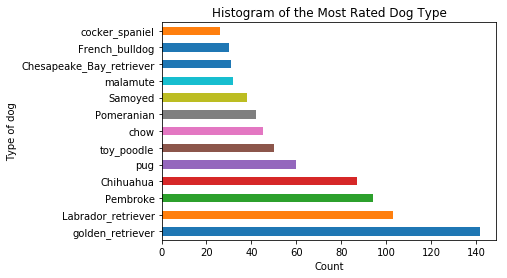

In [283]:
df_dog_type = df_twitter.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

<a id='two'></a>
### Insight two
Japanese_spaniel has the lowest average rating
Clumber has the highest average rating

In [284]:
df_dog_type_mean = df_twitter.groupby('dog_type').mean()


In [285]:
df_dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,year,month,day,rating,favorite_count,retweet_count,followers_count,friends_count
dog_type,,,,,,,,,,,
Afghan_hound,8.095999e+17,8.000000,10.0,2016.500000,6.00,16.000000,8.000000,11929.5000,3500.500000,6.829027e+06,103.0
Airedale,7.184489e+17,9.833333,10.0,2015.583333,8.75,15.916667,9.833333,5170.2500,1350.833333,6.829046e+06,103.0
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,2016.187500,5.25,15.000000,10.312500,9185.1875,2242.062500,6.829115e+06,103.0
Appenzeller,7.939334e+17,11.000000,10.0,2016.500000,4.50,18.500000,11.000000,7193.0000,1414.000000,6.829100e+06,103.0
Australian_terrier,7.785921e+17,11.500000,10.0,2016.500000,3.50,7.000000,11.500000,10906.5000,2983.000000,6.829102e+06,103.0


In [286]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

dog_type
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
soft-coated_wheaten_terrier     8.800000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
Tibetan_terrier                 9.250000
dalmatian                       9.272727
Boston_bull                     9.416667
Saint_Bernard                   9.500000
Welsh_springer_spaniel          9.500000
Dandie_Dinmont                  9.571429
Norwich_terrier                 9.600000
miniature_schnauzer             9.600000
redbone                         9.666667
English_setter                  9.714286
Maltese_dog                     9.736842
Rhodesian_ridgeback             9.750000
Scottish_deerhound              9.750000
Irish_terrier                   9.800000
Airedale                        9.833333
papillon                        9.833333
Newfoundland                    9.857143
Mexican_hairless                9.857143
miniature_poodle                9.875000
miniatu

In [287]:
print(df_twitter.loc[df_twitter.dog_type == 'Japanese_spaniel', 'url']) 

710    https://t.co/IoLRvF0Kak
Name: url, dtype: object


In [288]:
df_twitter[df_twitter['dog_type'] == 'golden_retriever']

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
8,667530908589760512,Meet Naphaniel. He doesn't necessarily enjoy h...,10.0,10.0,Naphaniel,None,2015,11,20,10.0,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,golden_retriever,0.633037,488.0,254.0,6829270.0,103.0,Twitter Web Client,Original tweet,https://t.co/xoRWyQTcmy
30,667044094246576128,12/10 gimme now https://t.co/QZAnwgnOMB,12.0,10.0,None,None,2015,11,18,12.0,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,golden_retriever,0.765266,191.0,51.0,6829275.0,103.0,Twitter for iPhone,Original tweet,https://t.co/QZAnwgnOMB
37,667160273090932737,This is Bradlay. He is a Ronaldinho Matsuyama ...,11.0,10.0,Bradlay,None,2015,11,19,11.0,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,golden_retriever,0.471351,262.0,65.0,6829274.0,103.0,Twitter for iPhone,Original tweet,https://t.co/DKhgkMx4N1
43,667182792070062081,This is Timison. He just told an awful joke bu...,10.0,10.0,Timison,None,2015,11,19,10.0,https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg,golden_retriever,0.949892,14751.0,6460.0,6829272.0,103.0,Twitter for iPhone,Original tweet,https://t.co/s2yYuHabWl
46,667211855547486208,This is Genevieve. She is a golden retriever c...,9.0,10.0,Genevieve,None,2015,11,19,9.0,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,golden_retriever,0.462556,505.0,250.0,6829272.0,103.0,Twitter for iPhone,Original tweet,https://t.co/azEoGqVonH
62,668286279830867968,Meet Rusty. Rusty's dreaming of a world where ...,11.0,10.0,Rusty,None,2015,11,22,11.0,https://pbs.twimg.com/media/CUY60usWoAAdBxx.jpg,golden_retriever,0.215944,524.0,144.0,6829266.0,103.0,Twitter for iPhone,Original tweet,https://t.co/C8U6cxI1Jc
76,666345417576210432,Look at this jokester thinking seat belt laws ...,10.0,10.0,None,None,2015,11,16,10.0,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,golden_retriever,0.858744,300.0,140.0,6829278.0,103.0,Twitter for iPhone,Original tweet,https://t.co/VFKG1vxGjB
78,666063827256086533,This is the happiest dog you will ever see. Ve...,10.0,10.0,the,None,2015,11,16,10.0,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,0.77593,479.0,223.0,6829279.0,103.0,Twitter for iPhone,Original tweet,https://t.co/RhUEAloehK
94,666057090499244032,My oh my. This is a rare blond Canadian terrie...,9.0,10.0,a,None,2015,11,16,9.0,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,0.00795896,298.0,141.0,6829279.0,103.0,Twitter for iPhone,Original tweet,https://t.co/yWBqbrzy8O
110,876484053909872640,This is Benedict. He wants to thank you for th...,13.0,10.0,Benedict,None,2017,6,18,13.0,https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg,golden_retriever,0.874566,18816.0,2434.0,6829012.0,103.0,Twitter for iPhone,Original tweet,https://t.co/ccBFQU5UWO


<a id='three'></a>
### Insight three & visualization

Dog_types with low number of ratings show a high variaty of mean ratings. 

In [289]:
df_dog_type_count = df_twitter.groupby('dog_type').count()
df_dog_type_count

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating,jpg_url,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
dog_type,,,,,,,,,,,,,,,,,,,
Afghan_hound,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Airedale,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Appenzeller,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Bedlington_terrier,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Bernese_mountain_dog,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Blenheim_spaniel,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Border_collie,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [290]:
dog_type_count = df_dog_type_count['rating']
dog_type_mean = df_dog_type_mean['rating']
dog_type_mean

dog_type
Afghan_hound                       8.000000
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
Bedlington_terrier                10.333333
Bernese_mountain_dog              11.272727
Blenheim_spaniel                  11.100000
Border_collie                     10.583333
Border_terrier                    12.142857
Boston_bull                        9.416667
Bouvier_des_Flandres              13.000000
Brabancon_griffon                 10.000000
Brittany_spaniel                  10.375000
Cardigan                          11.105263
Chesapeake_Bay_retriever          10.838710
Chihuahua                         10.448276
Dandie_Dinmont                     9.571429
Doberman                          11.333333
English_setter                     9.714286
English_springer                  10.555556
EntleBucher                       11.000000
Eskimo_dog             

In [291]:
df = pd.DataFrame()
df['dog_type_count'] = dog_type_count
df['dog_type_mean'] = dog_type_mean
df

,dog_type_count,dog_type_mean
dog_type,,
Afghan_hound,2,8.000000
Airedale,12,9.833333
American_Staffordshire_terrier,16,10.312500
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
Bedlington_terrier,6,10.333333
Bernese_mountain_dog,11,11.272727
Blenheim_spaniel,10,11.100000
Border_collie,12,10.583333


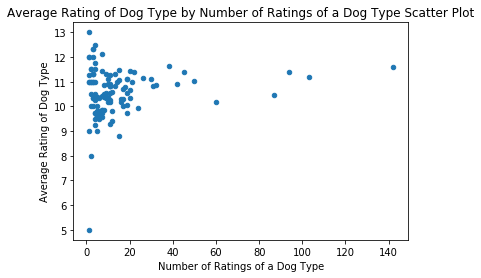

In [292]:
df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('output2.png',bbox_inches='tight');

<a id='four'></a>
### Insight four & visualization

The highest ratings do not receive the most retweets. 

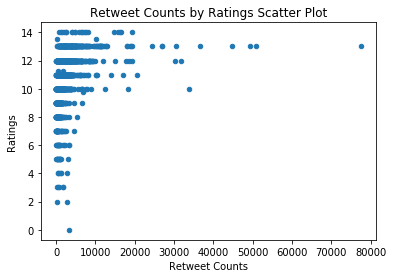

In [293]:
df_twitter.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');